In [39]:
import numpy as np
import pandas as pd
import os


In [53]:
import kagglehub
rjmanoj_credit_card_customer_churn_prediction_path = kagglehub.dataset_download('rjmanoj/credit-card-customer-churn-prediction')
print('Data source import complete.')

Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.
Data source import complete.


In [54]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [55]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [56]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [57]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [59]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [60]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# separate columns for each variant (France, Spain, Germany for Geography; Female, Male for Gender)
df['Geography'] = pd.Categorical(df['Geography'], categories=['France', 'Spain', 'Germany'])
df['Gender'] = pd.Categorical(df['Gender'], categories=['Female', 'Male'])

df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=False, dtype=int)

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [ ]:
# splitting the data into features and target (X = features/input, y = target/output)
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited'].values

In [78]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,0,1,0,1


In [ ]:
# importing libraries for data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

In [ ]:
# scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.91324755,  0.91324755]])

In [76]:
# importing deep learning libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
# model architecture
# 13 input features, 13 hidden layers, 1 output layer
model = Sequential()
model.add(Dense(13, activation='sigmoid', input_dim=13))
model.add(Dense(13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling the model
# optimizer = 'Adam' means we are using Adam optimizer
# loss = 'binary_crossentropy' means we are using binary cross entropy loss function
# metrics = ['accuracy'] means we want to see the accuracy of the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# training the model
# verbose = 1 means we want to see the progress bar
# validation_split = 0.2 means we want to use 20% of the training data for validation
# batch_size = 50 means we want to use 50 samples for each batch

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7890 - loss: 0.5774 - val_accuracy: 0.7987 - val_loss: 0.4900
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.4872 - val_accuracy: 0.7987 - val_loss: 0.4754
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4801 - val_accuracy: 0.7987 - val_loss: 0.4583
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7973 - loss: 0.4614 - val_accuracy: 0.7987 - val_loss: 0.4427
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4545 - val_accuracy: 0.8081 - val_loss: 0.4310
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4364 - val_accuracy: 0.8163 - val_loss: 0.4243
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4436 - val_accuracy: 0.8206 - val_loss: 0.4208
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4395 - val_accu

In [ ]:
# predicting on test data
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [84]:
y_pred

array([[0.1395323 ],
       [0.00621956],
       [0.00621956],
       ...,
       [0.00621956],
       [0.00621956],
       [0.01195166]], dtype=float32)

In [85]:
# converting probabilities to binary output
y_pred = y_pred.argmax(axis=-1)

In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy of the model
accuracy_score(y_test,y_pred)

0.8035

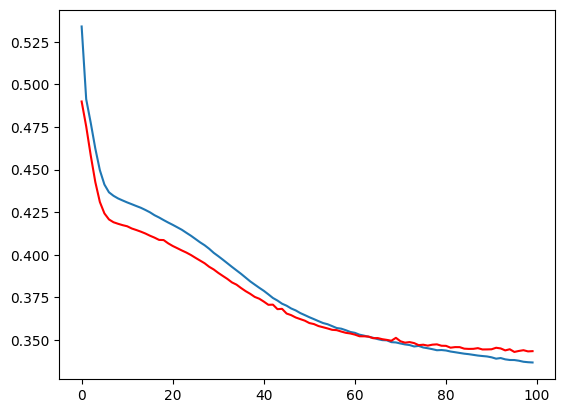

In [ ]:
import matplotlib.pyplot as plt
# plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color='red')

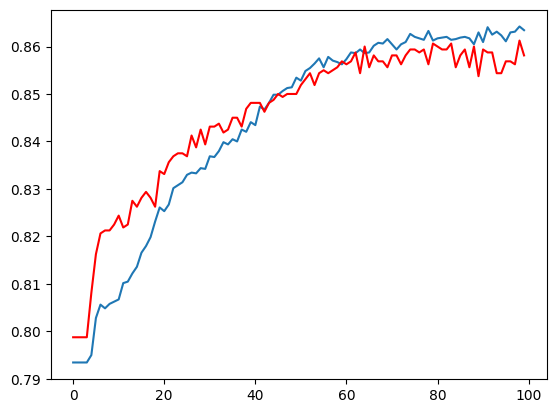

In [ ]:
# plotting accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='red')